In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Define indicators
gdp_indicator = "NY.GDP.MKTP.KD.ZG"  # GDP Growth (%)
unemployment_indicator = "SL.UEM.TOTL.ZS"  # Unemployment Rate (%)
inflation_indicator = "FP.CPI.TOTL.ZG"  # Inflation Rate (%)
years = list(range(2010, 2023))

# Function that gets all data from World Bank API
def fetch_data(indicator):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={years[0]}:{years[-1]}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()

    return pd.DataFrame([
        {"Country": entry["country"]["value"],
         "Code": entry["country"]["id"],
         "Year": entry["date"],
         "Value": entry["value"]}
        for entry in data[1]
    ]) if isinstance(data, list) and len(data) > 1 else pd.DataFrame()

# Get data for each indicator
gdp_df = fetch_data(gdp_indicator).rename(columns={"Value": "GDP Growth (%)"})
unemployment_df = fetch_data(unemployment_indicator).rename(columns={"Value": "Unemployment Rate (%)"})
inflation_df = fetch_data(inflation_indicator).rename(columns={"Value": "Inflation Rate (%)"})

# Merge all the coloumns
merged_df = gdp_df.merge(unemployment_df, on=["Country", "Year"], how="outer")
merged_df = merged_df.merge(inflation_df, on=["Country", "Year"], how="outer")


merged_df

,Country,Code_x,Year,GDP Growth (%),Code_y,Unemployment Rate (%),Code,Inflation Rate (%)
0,Africa Eastern and Southern,ZH,2022,3.553878,ZH,7.985202,ZH,10.773751
1,Africa Eastern and Southern,ZH,2021,4.576393,ZH,8.577385,ZH,7.240978
2,Africa Eastern and Southern,ZH,2020,-2.864293,ZH,8.191395,ZH,5.405162
3,Africa Eastern and Southern,ZH,2019,2.194319,ZH,7.584419,ZH,4.653665
4,Africa Eastern and Southern,ZH,2018,2.666632,ZH,7.360513,ZH,4.720805
...,...,...,...,...,...,...,...,...
995,British Virgin Islands,VG,2015,NaN,VG,NaN,VG,NaN
996,British Virgin Islands,VG,2014,NaN,VG,NaN,VG,NaN
997,British Virgin Islands,VG,2013,NaN,VG,NaN,VG,NaN
998,British Virgin Islands,VG,2012,NaN,VG,NaN,VG,NaN


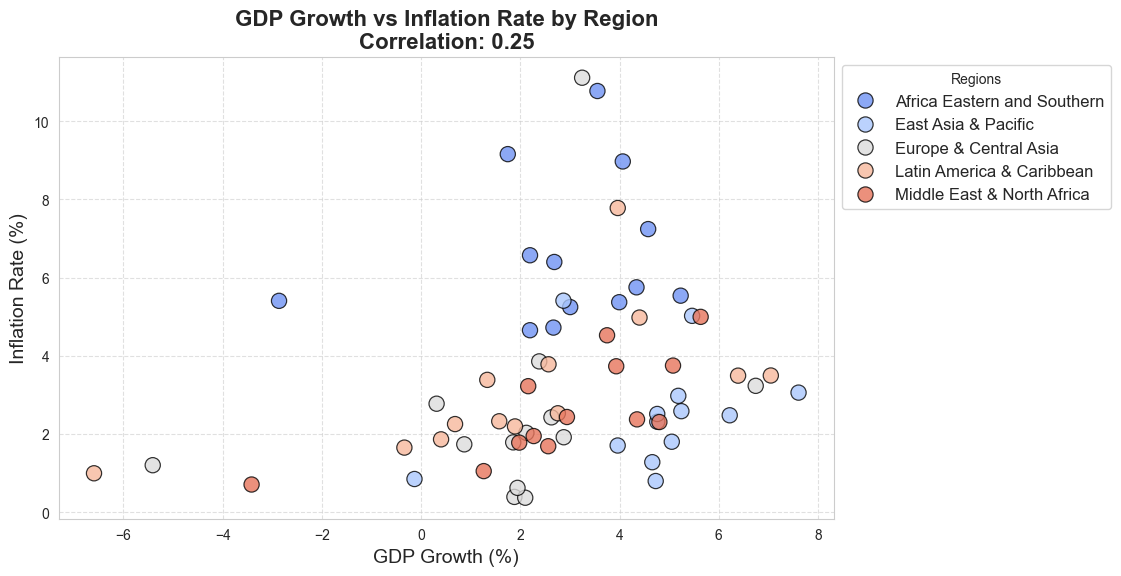

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#helps calcualte the correlation between the two numerical variables
from scipy.stats import pearsonr

sns.set_style("whitegrid")

plot_df = merged_df.dropna(subset=["GDP Growth (%)", "Inflation Rate (%)"])
regions_to_plot = ["Africa Eastern and Southern", "Latin America & Caribbean", 
                   "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]
plot_df = plot_df[plot_df["Country"].isin(regions_to_plot)]

# computing the correlation coefficient
correlation, p_value = pearsonr(plot_df["GDP Growth (%)"], plot_df["Inflation Rate (%)"])

# creating scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="GDP Growth (%)", y="Inflation Rate (%)", hue="Country", 
                palette="coolwarm", s=120, edgecolor="black", alpha=0.8)
ax.set_xlabel("GDP Growth (%)", fontsize=14)
ax.set_ylabel("Inflation Rate (%)", fontsize=14)
ax.set_title(f"GDP Growth vs Inflation Rate by Region\nCorrelation: {correlation:.2f}", fontsize=16, fontweight="bold")
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(title="Regions", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


The scatterplot above explores the relationship between GDP Growth (%) and Inflation Rate (%) across different world regions. Each data point represents a specific year and region, color-coded to distinguish between geographical areas. At first glance, the data suggests a weak positive correlation of 0.25, indicating that as GDP growth increases, inflation tends to rise slightly. However, this relationship is not particularly strong, implying that other economic factors likely play a more significant role in influencing inflation.

One noticeable pattern in the graph is the variation in inflation sensitivity across regions. For example, Africa Eastern and Southern show a wider range of inflation rates, even when GDP growth remains moderate. This suggests that external factors, such as commodity price fluctuations or political instability, may impact inflation more in certain regions than in others. In contrast, Europe & Central Asia display more stability, with less inflation variation, likely due to more regulated economic environments and policies. Latin America & the Caribbean appear to be more scattered, reflecting economic instability or inconsistent policy measures across different countries.

While this analysis highlights some patterns, the weak correlation suggests that using GDP Growth and Inflation Rate alone may not be sufficient to predict economic downturns or recessions. Our research aims to explore whether additional factors, such as unemployment rates and education levels, contribute to economic instability. The findings from this graph reinforce the need for a more comprehensive approach to economic prediction. By incorporating more diverse indicators, we can gain deeper insights into the factors driving recessions and assess whether machine learning can be used to identify early warning signs of economic downturns.